# The Sparks Foundation - Data Science & Business Analytics Internship
## Author - Mayur Pokharkar
## Task-1 : " Prediction using Supervised Learning "
### Problem Statement : Predict the percentage of an student based on the no. of study hours.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading the Dataset

In [2]:
data_url = "http://bit.ly/w-data"
dataset = pd.read_csv(data_url)
dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Dataset Visualization

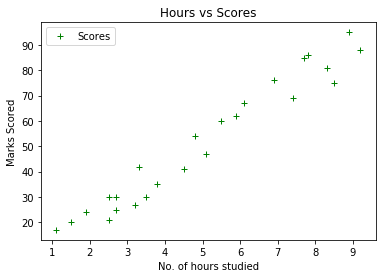

In [3]:
dataset.plot(x = "Hours", y = "Scores", style = 'og', marker = '+')
# plt.scatter(dataset.Hours, dataset.Scores ,marker ='+', color = 'green')
plt.title("Hours vs Scores")
plt.xlabel("No. of hours studied")
plt.ylabel("Marks Scored")
plt.show()

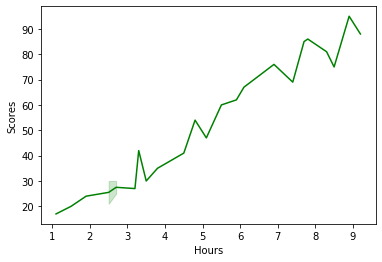

In [4]:
sns.lineplot(data=dataset, x = 'Hours', y = "Scores", color = 'green')
plt.show()

From the above graphs we can clearly observe that, the person who studies for more number of hours gets more marks and the graph also shows a positive slope.

### Dividing the dataset 

In [5]:
# X will the input for the model and y will be output for the input given
X = dataset.iloc[:,:-1].values # Hours
y = dataset.iloc[:,-1].values # Scores

In [6]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [7]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### Splitting the dataset

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 0)

### Training the model

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

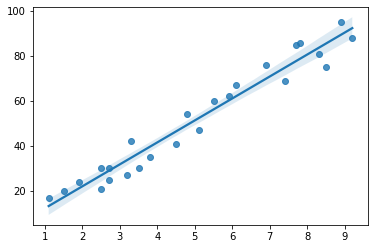

In [10]:
reg_line = model.coef_ * X + model.intercept_ # y = mx + c

# plt.scatter(X, y, color='green')
# plt.plot(X, reg_line)

sns.regplot(X,y)
plt.show()

### Testing

In [11]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [12]:
print(y_test)

[20 27 69 30 62]


In [13]:
y_pred = model.predict(X_test)

In [14]:
df = pd.DataFrame({'Actual_Scores': y_test,'Predicted_Scores':y_pred})

In [15]:
df

,Actual_Scores,Predicted_Scores
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### What will be the predicted score if a student studies for 9.25 hrs/day?

In [16]:
hours = 9.25
hours = np.array(hours).reshape(1,-1)
pred = model.predict(hours)
# print("Predicted Score : {}".format(pred))
print("If the student studies for 9.25 hours/day, his score will be {}.".format(round(pred[0], 2)))

If the student studies for 9.25 hours/day, his score will be 93.69.


### Model Evaluation

In [19]:
print("R-Squared : ", r2_score(y_test,y_pred))
print("Mean Squared Error : ", mean_squared_error(y_test,y_pred))
print("Mean Absolute Error : ", mean_absolute_error(y_test, y_pred))

R-Squared :  0.9454906892105356
Mean Squared Error :  21.5987693072174
Mean Absolute Error :  4.183859899002975
